# Python 데이터 분석
---

## 미금역 카페 리뷰 감성 분류
- <1. 크롤링> : 카카오맵 리뷰 크롤링
- <2. 전처리> : TF-IDF를 이용한 핵심어 추출
- <3. 분류> : 긍정, 부정 리뷰 분류
- <4. 활용> : 중요 키워드 분석

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <1. 크롤링> : 카카오맵 리뷰 크롤링

In [ ]:
#!pip install selenium : 셀레니움 설치
# 크롬 드라이버는 크롬 버전에 맞게 설치 

In [6]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

#window용 크롬 웹드라이버 실행 경로
excutable_pate = 'chromedriver.exe'

#크롤링 사이트 주소 정의
source_url = "https://map.kakao.com/"

#크롬 드라이버를 사용 / chromedriver.exe 경로 추가
driver=webdriver.Chrome(executable_path='C:/Users/hyoseok/data_science practice/chromedriver_win32/chromedriver.exe')

#카카오 지도에 접속
driver.get(source_url)

#검색창에 검색어를 입력
searchbox = driver.find_element_by_xpath("//input[@id='search.keyword.query']")
searchbox.send_keys("미금역 카페")

#검색버튼을 눌러서 결과를 가져옴
searchbutton =driver.find_element_by_xpath("//button[@id='search.keyword.submit']")
driver.execute_script("arguments[0].click();", searchbutton)

#검색 결과를 가져올 시간을 기다림
time.sleep(2)

#검색 결과의 페이지 소스를 가져옴
html = driver.page_source

#BeautifulSoup을 이용하여 html 정보를 파싱
soup = BeautifulSoup(html, "html.parser")
moreviews = soup.find_all(name="a", attrs={"class":"moreview"})

# a태그의 href 속성을 리스트로 추출, 크롤링할 페이지 리스트 생성
page_urls = []
for moreview in moreviews:
    page_url = moreview.get("href")
    print(page_url)
    page_urls.append(page_url)

#크롤링에 사용한 브라우저 종료
driver.close()

https://place.map.kakao.com/22401600
https://place.map.kakao.com/1860255454
https://place.map.kakao.com/23929866
https://place.map.kakao.com/1392486623
https://place.map.kakao.com/971021614
https://place.map.kakao.com/2032866340
https://place.map.kakao.com/447617919
https://place.map.kakao.com/991653650
https://place.map.kakao.com/1600666103
https://place.map.kakao.com/808719341
https://place.map.kakao.com/24529842
https://place.map.kakao.com/13064327
https://place.map.kakao.com/715306943
https://place.map.kakao.com/297894130
https://place.map.kakao.com/1253570061


### 미금역 카페 정보 크롤링

In [47]:
columns = ['score','review']
df = pd.DataFrame(columns=columns)

driver = webdriver.Chrome(executable_path = 'C:/Users/hyoseok/data_science practice/chromedriver_win32/chromedriver.exe')
for page_url in page_urls:
    
    #상세보기 페이지에 접속
    driver.get(page_url)
    time.sleep(2)
    
    #첫 페이지 리뷰를 크롤링 
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    contents_div =soup.find(name="div", attrs={"class":"evaluation_review"})
    
    #별점을 가져옴
    rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})
    
    #리뷰를 가져옴
    reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})
    
    for rate, review in zip(rates, reviews):
        row = [rate.text[0], review.find(name="span").text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
    #2-5페이지의 리뷰를 크롤링
    for button_num in range(2,6):
        #오류가 나는 경우(리뷰 페이지가 없는 경우), 수행하지 않음
        try:
            another_reviews = driver.find_element_by_xpath("//a[@data-page='" + str(button_num) + "']")
            another_reviews.click()
            time.sleep(2)
            
            #페이지 리뷰를 크롤링 
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            contents_div = soup.find(name="div",attrs={"class":"evaluation_review"})
            
            #별점을 가져옴
            rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})
            
            #리뷰를 가져옴
            reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})
            
            for rate, review in zip(rates, reviews):
                row = [rate.text[0], review.find(name="span").text]
                series = pd.Series(row, index=df.columns)
                df = df.append(series, ignore_index=True)
        except:
            break
driver.close()

In [5]:
#4점 이상의 리뷰는 긍정 리뷰, 3점 이하의 리뷰는 부정 리뷰로 평가
df['y'] = df['score'].apply(lambda x: 1 if float(x)>3 else 0)
print(df.shape)
df.head()

(234, 3)


,score,review,y
0,5,"드디어 먹어본 두세르, 테이블링 어플 줄서기 (오전 8시 이후 오픈) 가게 오픈 1...",1
1,5,굳굳 좋아요,1
2,5,줄서서 먹을 맛 아니라는 사람 어쩌구 저쩌고해서 기분 나쁘다는 사람 으짜고 저짜고해...,1
3,5,달면서 달지 않은? 은은한 맛이 좋아요 여러가지 먹어봤지만 바닐라빈 좋아하는 저는 ...,1
4,5,,1


In [6]:
df.to_csv("review_data.csv", index=False)
#df.to_csv("review_data.csv", index=False, encoding='euc-kr')
#encoding= 'euc-kr'로 한글 깨짐 방지 
#전처리 단계에서는 한글 깨짐 방지할 필요없음

## <2. 전처리> : `TF-IDF`를 이용한 핵심어 추출

### TF-IDF(Term Frequency - Inverse Document Frequency)란?
- TF(단어 빈도)는 특정한 단어가 **문서 내에 얼마나 자주 등장하는지를 나타내는 값**, 이 값이 **높을수록 문서에서 중요**하다고 생각할 수 있다.
- 하지만 하나의 문서에서 많이 나오지 않고 **다른 문서에서 자주 등장하며 단어의 중요도는 낮아진다.**
- 이를 **DF(문서 빈도)**라고 하며, 이 값의 역수를 **IDF(역문서 빈도)**라고 한다.
- TF-IDF는 TF와 IDF를 곱한 값으로 점수가 높은 단어일수록 **다른 문서에는 많지 않고 해당 문서에서 자주 등장하는 단어**를 의미한다.

### [형태소 추출하기]
한글 텍스트로 전처리

In [10]:
df = pd.read_csv("review_data.csv")
df.head()

,score,review,y
0,5,"드디어 먹어본 두세르, 테이블링 어플 줄서기 (오전 8시 이후 오픈) 가게 오픈 1...",1
1,5,굳굳 좋아요,1
2,5,줄서서 먹을 맛 아니라는 사람 어쩌구 저쩌고해서 기분 나쁘다는 사람 으짜고 저짜고해...,1
3,5,달면서 달지 않은? 은은한 맛이 좋아요 여러가지 먹어봤지만 바닐라빈 좋아하는 저는 ...,1
4,5,NaN,1


In [12]:
print(df.dtypes)

score      int64
review    object
y          int64
dtype: object


In [8]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출
    #hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')
    result = hangul.sub('', str(text))
    return result

In [12]:
# 함수를 적용하여 리뷰에서 한글만 추출
df = pd.read_csv("review_data.csv")
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['ko_text'].str.len() > 0]
df.head()

,score,y,ko_text
0,5,1,드디어 먹어본 두세르 테이블링 어플 줄서기 오전 시 이후 오픈 가게 오픈 시 두번...
1,5,1,굳굳 좋아요
2,5,1,줄서서 먹을 맛 아니라는 사람 어쩌구 저쩌고해서 기분 나쁘다는 사람 으짜고 저짜고해...
3,5,1,달면서 달지 않은 은은한 맛이 좋아요 여러가지 먹어봤지만 바닐라빈 좋아하는 저는 ...
5,3,0,좋아용


- Konlpy는 형태소 분석 라이브러리 중 **한국어 정보처리를 위한 python 패키지**이다.

In [19]:
#!pip install konlpy

In [13]:
from konlpy.tag import Okt

#konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag)for word, tag in pos]
    return pos

#형태소 추출 동작을 테스트
result = get_pos(df['ko_text'].values[0])
print(result)

['드디어/Adverb', '먹어/Verb', '본/Verb', '두/Determiner', '세르/Noun', '테이블/Noun', '링/Noun', '어플/Noun', '줄/Noun', '서기/Noun', '오전/Noun', '시/Noun', '이후/Noun', '오픈/Noun', '가게/Noun', '오픈/Noun', '시/Noun', '두/Determiner', '번/Noun', '와/Verb', '야하는/Adjective', '번거로/Adjective', '움/Noun', '에도/Josa', '먹어/Verb', '볼/Noun', '만/Suffix', '한/Josa', '가치/Noun', '가/Josa', '있네요/Adjective']


### [ 분류 모델의 학습 데이터로 변환]
corpus index 생성

- Sklearn(사이킷런)이란? 
---
사이킷런은 파이썬을 대표하는 오픈소스의 무료 머신러닝 라이브러리이다.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X= index_vectorizer.fit_transform(df['ko_text'].tolist())

In [15]:
X.shape

(204, 1713)

In [16]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'드디어/Adverb': 423, '먹어/Verb': 583, '본/Verb': 720, '두/Determiner': 414, '세르/Noun': 847, '테이블/Noun': ..


In [29]:
print(df['ko_text'].values[0])
print(X[0])

드디어 먹어본 두세르 테이블링 어플 줄서기 오전 시 이후 오픈 가게 오픈 시  두번 와야하는 번거로움에도 먹어볼만한 가치가 있네요
  (0, 423)	1
  (0, 583)	2
  (0, 720)	1
  (0, 414)	2
  (0, 847)	1
  (0, 1560)	1
  (0, 491)	1
  (0, 1041)	1
  (0, 1407)	1
  (0, 832)	1
  (0, 1111)	1
  (0, 879)	2
  (0, 1232)	1
  (0, 1114)	2
  (0, 20)	1
  (0, 693)	1
  (0, 1124)	1
  (0, 1026)	1
  (0, 695)	1
  (0, 1159)	1
  (0, 1068)	1
  (0, 726)	1
  (0, 510)	1
  (0, 1652)	1
  (0, 50)	1
  (0, 18)	1
  (0, 1267)	1


### [TF-IDF로 변환]

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

#TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [18]:
print(X.shape)
print(X[0])

(204, 1713)
  (0, 1652)	0.1515512817134298
  (0, 1560)	0.12926513818081206
  (0, 1407)	0.1515512817134298
  (0, 1267)	0.18101196097588948
  (0, 1232)	0.1679754027236188
  (0, 1159)	0.1515512817134298
  (0, 1124)	0.1679754027236188
  (0, 1114)	0.3174516348865435
  (0, 1111)	0.1679754027236188
  (0, 1068)	0.14568925919100104
  (0, 1041)	0.18101196097588948
  (0, 1026)	0.18101196097588948
  (0, 879)	0.36202392195177896
  (0, 847)	0.18101196097588948
  (0, 832)	0.18101196097588948
  (0, 726)	0.1515512817134298
  (0, 720)	0.1679754027236188
  (0, 695)	0.18101196097588948
  (0, 693)	0.14073298976853058
  (0, 583)	0.3031025634268596
  (0, 510)	0.1679754027236188
  (0, 491)	0.1679754027236188
  (0, 423)	0.18101196097588948
  (0, 414)	0.2585302763616241
  (0, 50)	0.18101196097588948
  (0, 20)	0.1515512817134298
  (0, 18)	0.07387455917067733


## <3. 분류> : 긍정, 부정 리뷰 분류
### [분류 모델링]
데이터셋 분리

In [19]:
from sklearn.model_selection import train_test_split

y= df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(x_train.shape)
print(x_test.shape)

(142, 1713)
(62, 1713)


----
**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#로지스틱 회귀 모델의 성능 평가
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


accuracy: 0.61
Precision: 0.613
Recall: 1.000
F1: 0.760


In [21]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix를 출력
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 0 24]
 [ 0 38]]


AUC : 0.806 


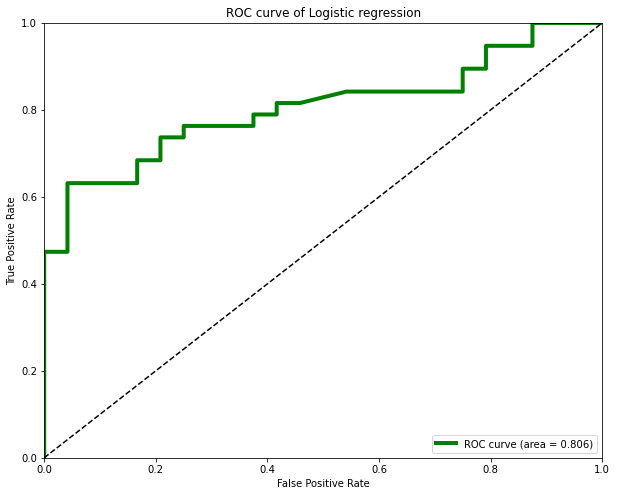

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

#AUC를 계산 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f " % roc_auc)

#ROC curve 그래프 출력
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)'% roc_auc,
        color = 'green', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

---
## <4. 활용> : 중요 키워드 분석
### [회귀 모델의 피처 영향력 추출]

<BarContainer object of 1713 artists>

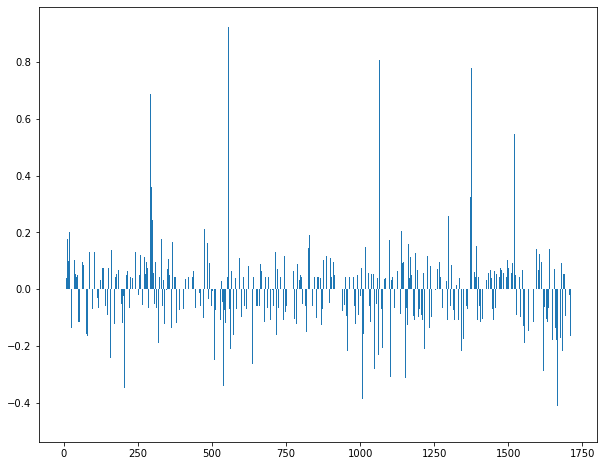

In [27]:
# 학습한 회귀 모델의 계수를 출력
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [28]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

[(0.9244011216276589, 555), (0.8384360770852016, 386), (0.8066612954012852, 1065), (0.7787053981444888, 1376), (0.6875717170005636, 292)]
[(-0.4138207233811742, 1666), (-0.41924419639541893, 863), (-0.42009695070613046, 624), (-0.445331700668602, 154), (-0.4686709626859189, 182)]


### [ 중요 피처의 형태소]

In [29]:
#회귀 모델의 계수를 높은 순으로 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [32]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력할 수 있게 만듬
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

#계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력/ 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는 형태소임
print(str(invert_index_vectorizer)[:100]+'..')

{423: '드디어/Adverb', 583: '먹어/Verb', 720: '본/Verb', 414: '두/Determiner', 847: '세르/Noun', 1560: '테이블/N..


In [34]:
# 상위 20개의 긍정 형태소 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0])

맛있어요/Adjective 0.9244011216276589
도/Josa 0.8384360770852016
에그타르트/Noun 0.8066612954012852
좋아요/Adjective 0.7787053981444888
너무/Adverb 0.6875717170005636
님/Suffix 0.550716664042156
커피/Noun 0.5468958637113849
진짜/Noun 0.5461952922378718
사장/Noun 0.5186048051370435
분위기/Noun 0.4485258208223546
맛있네요/Adjective 0.3953650543351367
맛있고/Adjective 0.38755126865936645
샌드위치/Noun 0.3697515028543354
넓고/Adjective 0.3590068432482834
친절하시네요/Adjective 0.3544287995478899
카페/Noun 0.35215782910407717
케이크/Noun 0.33516795623762896
티/Noun 0.33153498538293197
좋고/Adjective 0.3256669256087743
맛있음/Adjective 0.286745623196541


In [37]:
# 상위 20개의 부정 형태소 출력
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

우유/Noun -0.3126111058361142
편하고/Adjective -0.3152813418717327
않음/Verb -0.31541670872876193
불친절/Noun -0.32621428531132646
여자/Noun -0.3271903112330773
은/Josa -0.3322113909345883
움/Noun -0.33775819413474856
맛/Noun -0.3422978149212445
힘들어요/Adjective -0.3487951181712731
기다리기/Verb -0.3487951181712731
뷰/Noun -0.36392541190825556
않은/Verb -0.38610363954513705
좋아용/Adjective -0.39618558295717454
알바/Noun -0.3980582607175567
말/Noun -0.40376289848877644
함/Noun -0.4138207233811742
손님/Noun -0.41924419639541893
무난/Noun -0.42009695070613046
괜찮아요/Adjective -0.445331700668602
그냥/Noun -0.4686709626859189


### [품사별 형태소 추출]

In [41]:
# 명사, 동사, 형용사 추출
noun_list = []
verb_list = []
adj_list = []

for coef in coef_pos_index[:100]:
    pos_category = invert_index_vectorizer[coef[1]].split("/")[1]
    if pos_category == "Noun":
        noun_list.append((invert_index_vectorizer[coef[1]], coef[0]))
    elif pos_category == "Verb":
        verb_list.append((invert_index_vectorizer[coef[1]], coef[0]))
    elif pos_category == "Adjective":
        adj_list.append((invert_index_vectorizer[coef[1]], coef[0]))


In [44]:
#상위 20개의 명사 출력
noun_list[:20]

[('에그타르트/Noun', 0.8066612954012852),
 ('커피/Noun', 0.5468958637113849),
 ('진짜/Noun', 0.5461952922378718),
 ('사장/Noun', 0.5186048051370435),
 ('분위기/Noun', 0.4485258208223546),
 ('샌드위치/Noun', 0.3697515028543354),
 ('카페/Noun', 0.35215782910407717),
 ('케이크/Noun', 0.33516795623762896),
 ('티/Noun', 0.33153498538293197),
 ('주문/Noun', 0.26060069897705596),
 ('잔/Noun', 0.2575631743815958),
 ('존맛/Noun', 0.24537917643668888),
 ('동네/Noun', 0.2310009427678896),
 ('재료/Noun', 0.21745597830648647),
 ('추천/Noun', 0.21614035452033625),
 ('맛집/Noun', 0.2154373199772001),
 ('라떼/Noun', 0.21014383506362447),
 ('항상/Noun', 0.2099772898377996),
 ('굿/Noun', 0.20690468706982304),
 ('좀/Noun', 0.20659801314596932)]

In [45]:
#상위 20개의 동사 출력
verb_list[:20]

[('넘/Verb', 0.2436176351478929),
 ('드세요/Verb', 0.192466746980243),
 ('커요/Verb', 0.19096301390743076),
 ('빼면/Verb', 0.17648689107392357),
 ('푸/Verb', 0.15884914015281015),
 ('먹고/Verb', 0.15788701699809934),
 ('생각날/Verb', 0.14418989581069347),
 ('가는/Verb', 0.14418989581069347),
 ('마셔/Verb', 0.14080924204013073)]

In [46]:
#상위 20개의 형용사 출력
adj_list[:20]

[('맛있어요/Adjective', 0.9244011216276589),
 ('좋아요/Adjective', 0.7787053981444888),
 ('맛있네요/Adjective', 0.3953650543351367),
 ('맛있고/Adjective', 0.38755126865936645),
 ('넓고/Adjective', 0.3590068432482834),
 ('친절하시네요/Adjective', 0.3544287995478899),
 ('좋고/Adjective', 0.3256669256087743),
 ('맛있음/Adjective', 0.286745623196541),
 ('좋은/Adjective', 0.28068513179952115),
 ('굳/Adjective', 0.2717479323613774),
 ('예뻐요/Adjective', 0.2587863137063215),
 ('친절해요/Adjective', 0.25644660965141364),
 ('많아요/Adjective', 0.18434669896829925),
 ('만족합니다/Adjective', 0.17762586525242843),
 ('귀여운/Adjective', 0.17382978074293415),
 ('가까워서/Adjective', 0.17338700000579946),
 ('작긴한데/Adjective', 0.17203822821460105),
 ('괜찮던데요/Adjective', 0.17203822821460105),
 ('예쁜/Adjective', 0.17143198558635683),
 ('좋네요/Adjective', 0.16643991165986063)]

### [참고 자료]

- https://github.com/yoonkt200/python-data-analysis
- <이것이 데이터 분석이다 - 파이썬편, 한빛미디어>
